# Importando bibliotecas

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from math import factorial
from scipy import stats as st
import math
import plotly.express as px
from datetime import datetime
import requests
from bs4 import BeautifulSoup
import re

# Importando dados e otimizando para análise

In [2]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv', dtype = {'Device':'category'}, parse_dates = ['Start Ts', 'End Ts'])

In [3]:
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  category      
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [4]:
# Renomeando as colunas
df_visits.columns

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')

In [5]:
df_visits = df_visits.rename(columns={'Device':'device', 'End Ts': 'end_ts', 'Source Id': 'source_id', 'Start Ts': 'start_ts', 'Uid': 'uid'})
df_visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   device     359400 non-null  category      
 1   end_ts     359400 non-null  datetime64[ns]
 2   source_id  359400 non-null  int64         
 3   start_ts   359400 non-null  datetime64[ns]
 4   uid        359400 non-null  uint64        
dtypes: category(1), datetime64[ns](2), int64(1), uint64(1)
memory usage: 11.3 MB


In [6]:
# Procurando valores duplicados
df_visits_duplicated = df_visits[df_visits.duplicated()]
print(df_visits_duplicated)

Empty DataFrame
Columns: [device, end_ts, source_id, start_ts, uid]
Index: []


In [7]:
df_orders = pd.read_csv('/datasets/orders_log_us.csv', parse_dates = ['Buy Ts'])

In [8]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [9]:
# Renomeando as colunas
df_orders = df_orders.rename(columns={'Buy Ts': 'buy_ts', 'Revenue': 'revenue', 'Uid': 'uid'})
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   buy_ts   50415 non-null  datetime64[ns]
 1   revenue  50415 non-null  float64       
 2   uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [10]:
# Procurando valores duplicados
df_orders_duplicated = df_orders[df_orders.duplicated()]
print(df_orders_duplicated)

Empty DataFrame
Columns: [buy_ts, revenue, uid]
Index: []


In [11]:
df_costs = pd.read_csv('/datasets/costs_us.csv', parse_dates=['dt'])

In [12]:
df_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


In [13]:
# Procurando valores duplciados
df_costs_duplicated = df_costs[df_costs.duplicated()]
print(df_costs_duplicated)

Empty DataFrame
Columns: [source_id, dt, costs]
Index: []


- com a utilização do dytpe e parse_dates foi possivel diminuit o tamanho do conjunto de dados
- não existem valores ausentes ou duplicados

In [14]:
df_visits['start_ts'] = pd.to_datetime(df_visits['start_ts'])
df_visits['end_ts'] = pd.to_datetime(df_visits['end_ts'])
df_orders['buy_ts'] = pd.to_datetime(df_orders['buy_ts'])
df_costs['df'] = pd.to_datetime(df_costs['dt'])

# Quantas pessoas usam os produtos cada dia, semana e mês?

In [15]:
df_visits['visit_year'] = df_visits['start_ts'].dt.to_period('Y')
df_visits['visit_month'] = df_visits['start_ts'].dt.to_period('M')
df_visits['visit_week'] = df_visits['start_ts'].dt.to_period('W')
df_visits['visit_date'] = df_visits['start_ts'].dt.date

In [16]:
df_visits.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-18/2017-12-24,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-19/2018-02-25,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-26/2017-07-02,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-14/2018-05-20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017,2017-12,2017-12-25/2017-12-31,2017-12-27


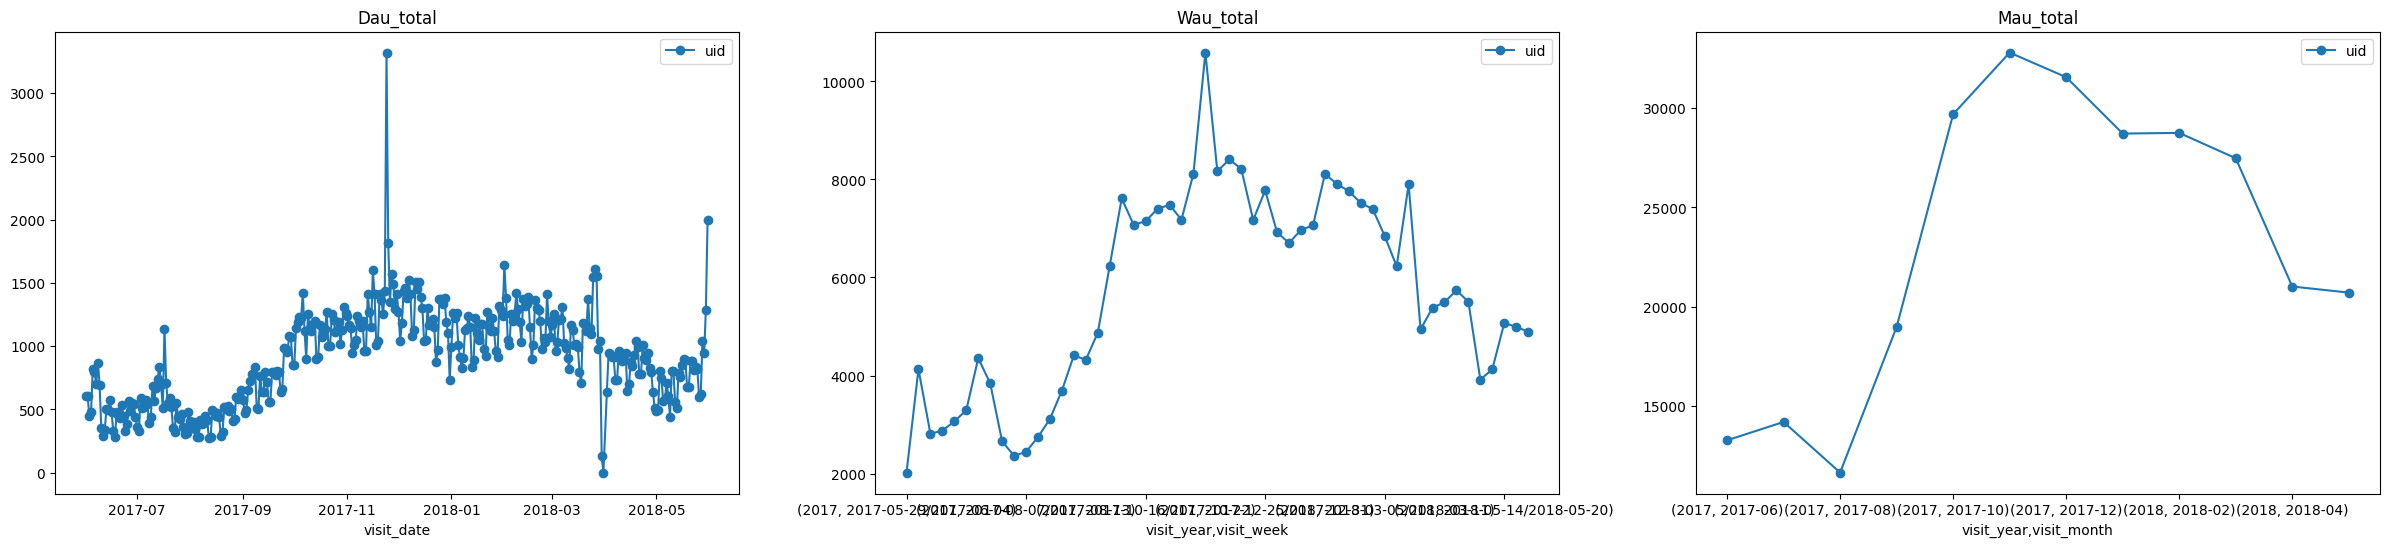

In [17]:
# Gráficos diário, semanal e mensal
fig, ax = plt.subplots(1, 3, figsize = (30, 6))

dau_total = df_visits.groupby('visit_date').agg({'uid':'nunique'})
dau_total.plot(ax = ax[0], marker = 'o')
ax[0].set_title('Dau_total')

wau_total = df_visits.groupby(['visit_year', 'visit_week']).agg({'uid':'nunique'})
wau_total.plot(ax = ax[1], marker = 'o')
ax[1].set_title('Wau_total')

mau_total = df_visits.groupby(['visit_year', 'visit_month']).agg({'uid':'nunique'})
mau_total.plot(ax = ax[2], marker = 'o')
ax[2].set_title('Mau_total');

- com essas três análises, foi possivel ver a diferença entre a quantidade de visitas durante uma semana, um mês e um ano
- foi possível perceber que todas as análises existem picos e que isso é muito mais fácil de perceber quando a análise fica mais específica, como na análise diária


# Quantas sessões ocorrem por dia?

In [18]:
visits_per_day = df_visits.groupby(['visit_year', 'visit_month']).agg({'uid': ['count', 'nunique']})
visits_per_day.columns = ['n_visits', 'n_uid']
visits_per_day['visits_per_day'] = visits_per_day['n_visits'] / visits_per_day['n_uid']
print(visits_per_day)

                        n_visits  n_uid  visits_per_day
visit_year visit_month                                 
2017       2017-06         16505  13259        1.244815
           2017-07         17828  14183        1.256998
           2017-08         14355  11631        1.234202
           2017-09         23907  18975        1.259921
           2017-10         37903  29692        1.276539
           2017-11         43969  32797        1.340641
           2017-12         41983  31557        1.330386
2018       2018-01         36939  28716        1.286356
           2018-02         37182  28749        1.293332
           2018-03         35679  27473        1.298693
           2018-04         26515  21008        1.262138
           2018-05         26635  20701        1.286653


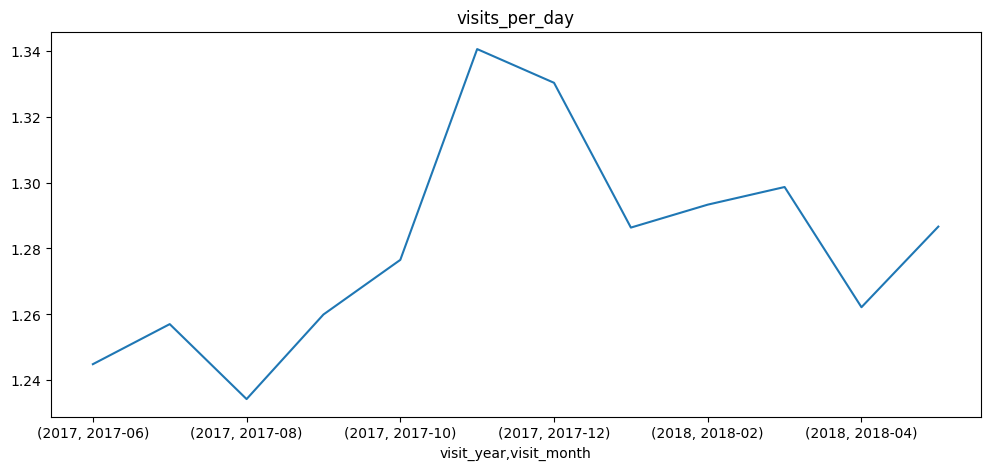

In [19]:
plt.figure(figsize= (12, 5))
visits_per_day['visits_per_day'].plot().set(title = 'visits_per_day');


In [20]:
visits_day = df_visits.groupby('visit_date').agg({'uid':['count','nunique']})
visits_day.columns = ['n_visits','n_uid']
visits_day['visits_day'] = visits_day['n_visits'] / visits_day['n_uid']

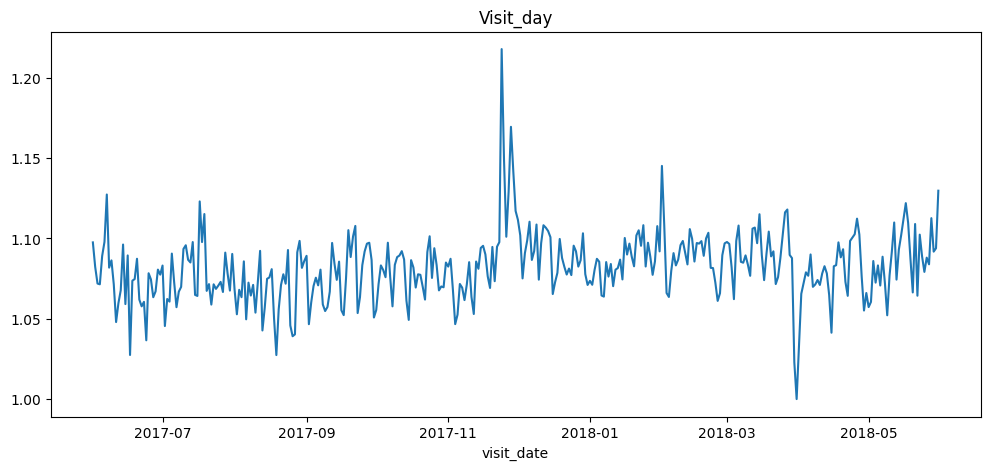

In [21]:
plt.figure(figsize = (12, 5))
visits_day['visits_day'].plot().set(title = 'Visit_day');

- a partir dessas análises foi possível perceber como as visitas variam no decorrer do tempo e que em vários momentos é posspivel perceber picos onde a quantidade de visitas é bem maior a também quando a quantidade é bem menor

# Que comprimento tem cada sessão?

In [22]:
df_visits['visit_duration'] = (df_visits['end_ts'] - df_visits['start_ts']).dt.seconds
print(df_visits['visit_duration'].mean())

643.506488592098


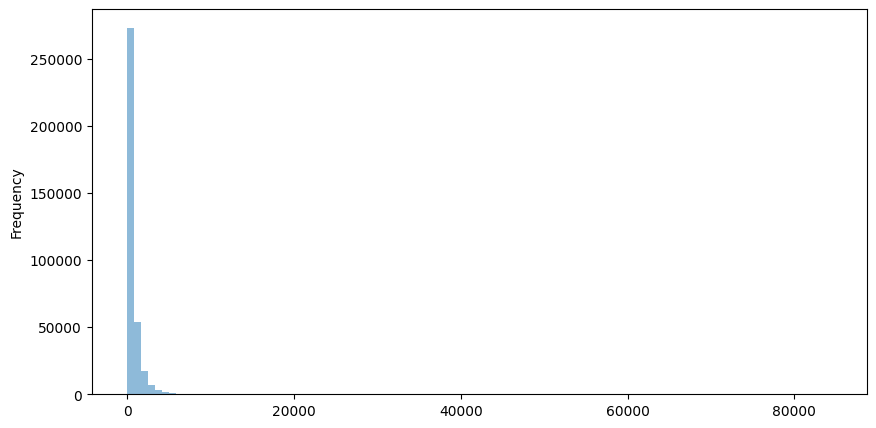

In [23]:
df_visits['visit_duration'].plot(kind='hist', figsize=(10, 5), bins=100, alpha=0.5)
plt.show()

In [24]:
source_id_unique = df_visits.groupby('source_id')['visit_duration'].mean()
source_id_unique

source_id
1     1039.361156
2      844.717318
3      573.283705
4      559.841042
5      526.742187
6     1370.000000
7      606.666667
9      572.543496
10     662.443890
Name: visit_duration, dtype: float64

- foi possível observar a quantidade de sessóes que ocorerm por dia
- como em média dura cada sessão
- com que frequência os usuários voltam 

- fazendo uma análise entre os source, é possível perceber que existe um grande diferença entre eles
- por exemplo, o source 1 e o 6 são bem maiores do que os outros

# Com que frequência os usuários voltam?

# Retenção

In [25]:
# Retenção dos clientes
first_visit = df_visits.groupby('uid').agg({'visit_month': 'min'}).reset_index().rename(columns={'visit_month': 'first_month'})
first_visit.head()

,uid,first_month
0,11863502262781,2018-03
1,49537067089222,2018-02
2,297729379853735,2017-06
3,313578113262317,2017-09
4,325320750514679,2017-09


In [26]:
visit_first_day = df_visits.merge(first_visit, on='uid')
visit_first_day.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_month
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-18/2017-12-24,2017-12-20,1080,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-19/2018-02-25,2018-02-19,1680,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-26/2017-07-02,2017-07-01,0,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-14/2018-05-20,2018-05-20,1440,2018-03
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03,2018-03-05/2018-03-11,2018-03-09,1680,2018-03


In [27]:
visit_first_day['month_diff'] = visit_first_day['visit_month'].astype(int) - visit_first_day['first_month'].astype(int)
visit_first_day.head()

,device,end_ts,source_id,start_ts,uid,visit_year,visit_month,visit_week,visit_date,visit_duration,first_month,month_diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017,2017-12,2017-12-18/2017-12-24,2017-12-20,1080,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018,2018-02,2018-02-19/2018-02-25,2018-02-19,1680,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017,2017-07,2017-06-26/2017-07-02,2017-07-01,0,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018,2018-05,2018-05-14/2018-05-20,2018-05-20,1440,2018-03,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018,2018-03,2018-03-05/2018-03-11,2018-03-09,1680,2018-03,0


In [28]:
retention_visit = visit_first_day.pivot_table(
    index = 'first_month',
    columns = 'month_diff',
    values = 'uid',
    aggfunc = 'nunique'
)
retention_visit.fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [29]:
retention_rate_visit = retention_visit.copy()
for col in retention_rate_visit.columns[1:]:
    retention_rate_visit[col] = retention_rate_visit[col] / retention_rate_visit[0]
    
retention_rate_visit[0] = retention_rate_visit[0] / retention_rate_visit[0]

retention_rate_visit.fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,
2017-08,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,,
2017-09,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.03586,0.024186,0.022809,,,
2017-10,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,,,,
2017-11,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.0218,,,,,
2017-12,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,,,,,,
2018-01,1.0,0.059715,0.039339,0.024973,0.020244,,,,,,,
2018-02,1.0,0.05708,0.025454,0.020093,,,,,,,,


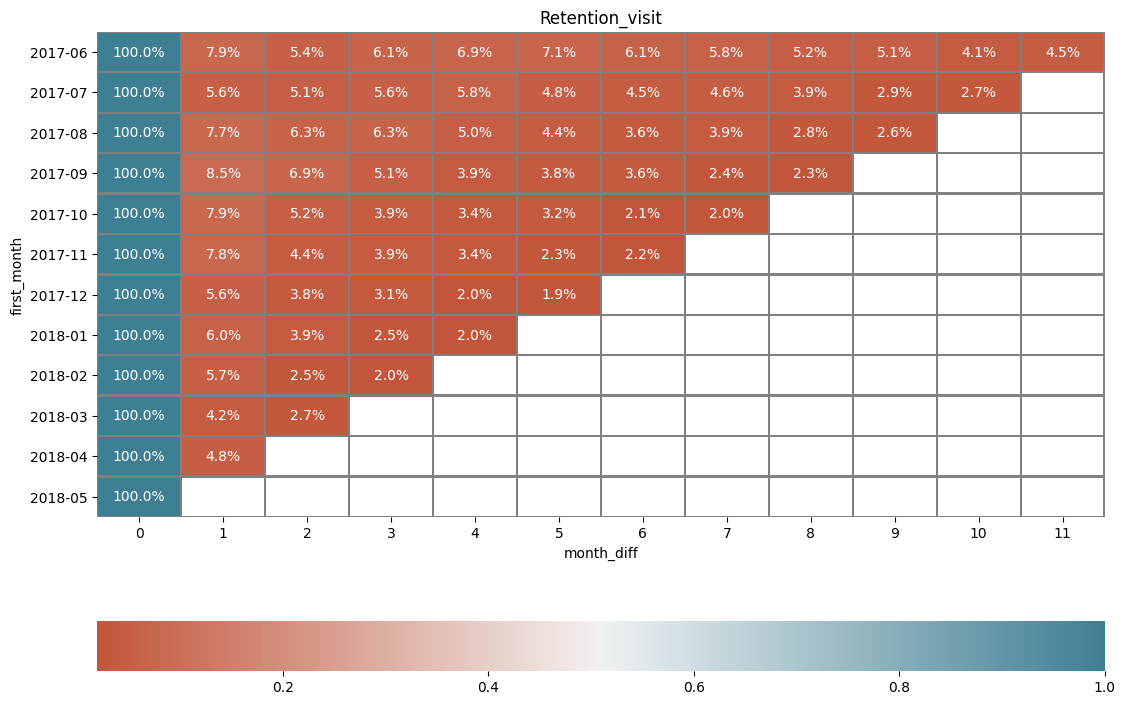

In [30]:
plt.figure(figsize=(13, 9))
sns.heatmap(retention_rate_visit, annot=True, fmt='.1%', linewidths=1, linecolor='grey', cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws={'orientation':'horizontal'}).set(title = "Retention_visit")

plt.show()

- nesse cohort é possível perceber a porcentagem de retenção dos clientes em cada periodo de tempo
- a porcentagem não varia muito, o que não é muito bom, pois mostra que não está tendo um aumento da quantidade de clientes que permanecem

# Quando as pessoas começam a comprar?

In [31]:
df_orders['order_month'] = df_orders['buy_ts'].astype('datetime64[M]')

In [32]:
first_order = df_orders.groupby('uid').agg({'order_month':'min'}).reset_index().rename(columns={'order_month': 'first_purchase'})
first_order.head()

,uid,first_purchase
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [33]:
first_visit_order = df_visits.groupby('uid').agg({'start_ts': 'min'}).reset_index().rename(columns={'start_ts': 'first_visit'})
first_purchase = first_visit_order.merge(first_order, on='uid')
first_purchase.head()

,uid,first_visit,first_purchase
0,313578113262317,2017-09-18 22:49:00,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-01


In [34]:
first_purchase['time_first'] = first_purchase['first_purchase'] - first_purchase['first_visit']
first_purchase['time_first'] = first_purchase['time_first'].dt.days


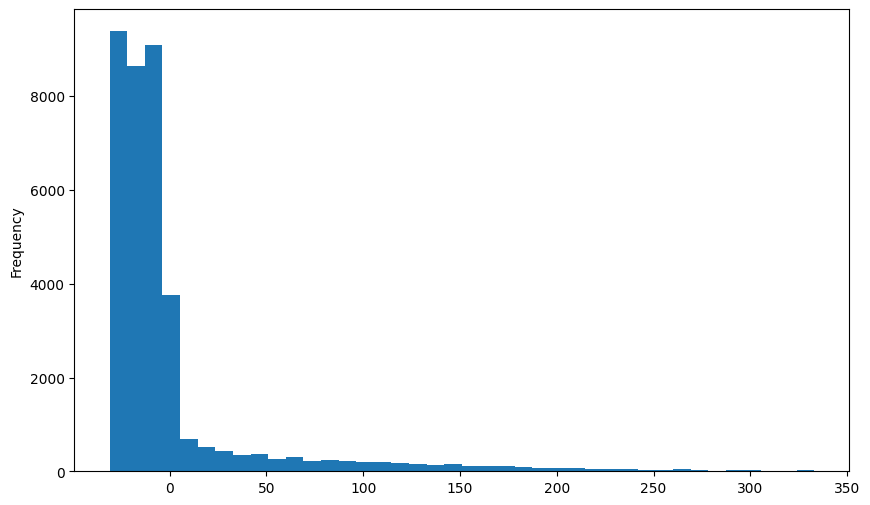

In [35]:
first_purchase['time_first'].plot(kind='hist', figsize=(10, 6), bins=40)
plt.show()

In [36]:
df_orders['week'] = df_orders['buy_ts'].dt.to_period('W')
weekly_order = df_orders.groupby('week')['uid'].count()


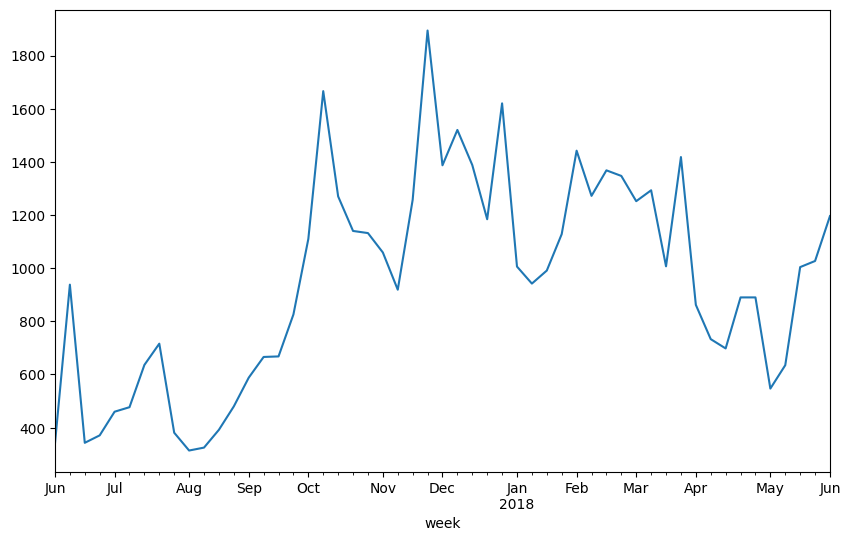

In [37]:
plt.figure(figsize=(10, 6))
weekly_order.plot(kind='line')
plt.show()

In [38]:
avg_weekly_order = df_orders.groupby('week').agg({'uid': 'count', 'revenue': 'sum'})
avg_weekly_order['avg_revenue'] = avg_weekly_order['revenue'] / avg_weekly_order['uid']


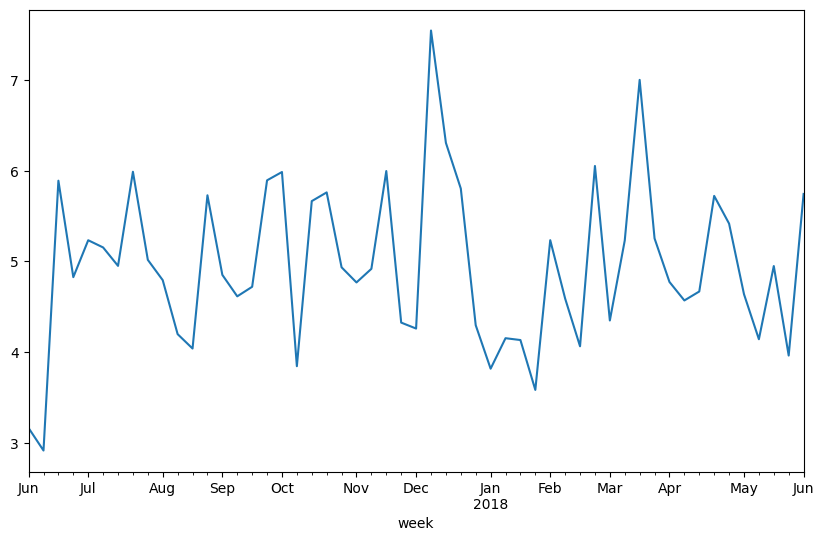

In [39]:
avg_weekly_order['avg_revenue'].plot(kind='line', figsize=(10, 6))
plt.show()

In [40]:
df_orders['month'] = df_orders['buy_ts'].dt.to_period('M')
df_orders.head()

,buy_ts,revenue,uid,order_month,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06


In [41]:
first_order_visit = first_visit.merge(df_orders, on='uid')
first_order_visit.head()

,uid,first_month,buy_ts,revenue,order_month,week,month
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01/2018-01-07,2018-01
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-01,2017-05-29/2017-06-04,2017-06
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-01,2017-05-29/2017-06-04,2017-06
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-09/2017-10-15,2017-10
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-22/2018-01-28,2018-01


In [42]:
first_order_visit['month_diff'] = first_order_visit['month'].astype(int) - first_order_visit['first_month'].astype(int)
first_order_visit.head()

,uid,first_month,buy_ts,revenue,order_month,week,month,month_diff
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01/2018-01-07,2018-01,4
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-01,2017-05-29/2017-06-04,2017-06,0
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-01,2017-05-29/2017-06-04,2017-06,0
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-09/2017-10-15,2017-10,0
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-22/2018-01-28,2018-01,0


- foi possivel descobrir quando os clientes fizeram os pedidos
- quanto tempo demora para fazer um novo pedido

In [43]:
purchase_visit = first_order_visit.groupby(['uid', 'first_month', 'month_diff']).agg({'revenue': 'sum'}).rename(columns={'revenue': 'customer_purchase'})
purchase_visit.sort_values(by=['uid', 'month_diff']).head()

,,,customer_purchase
uid,first_month,month_diff,
313578113262317,2017-09,4,0.55
1575281904278712,2017-06,0,3.05
2429014661409475,2017-10,0,73.33
2464366381792757,2018-01,0,2.44
2551852515556206,2017-11,0,10.99


In [44]:
purchase_user = purchase_visit.pivot_table(
    index = 'first_month',
    columns = 'month_diff',
    values = 'customer_purchase',
    aggfunc = 'mean'
)
purchase_user.fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,4.724414,11.534978,11.354186,20.649415,15.333035,13.913695,18.465344,14.650387,13.476221,22.318205,19.333421,11.543772
2017-07,5.633137,7.846519,7.442282,6.382857,5.535882,6.000602,4.819672,6.017969,6.300174,8.20875,6.2288,
2017-08,5.161267,6.393077,7.256159,8.087265,7.864466,7.011842,6.403289,14.491047,15.672453,6.477931,,
2017-09,5.475055,10.138301,8.757801,58.645674,11.607928,13.643214,6.906,7.121449,4.500753,,,
2017-10,4.882297,8.003845,4.544589,5.370812,5.270051,5.775085,4.990603,5.33252,,,,
2017-11,4.924573,4.797806,5.105894,7.48377,5.516119,6.492018,5.415504,,,,,
2017-12,4.828702,5.269788,22.213228,27.400107,16.753678,14.372016,,,,,,
2018-01,4.007946,6.099063,6.655771,3.871899,5.860778,,,,,,,
2018-02,4.036687,7.062135,6.698889,8.500094,,,,,,,,


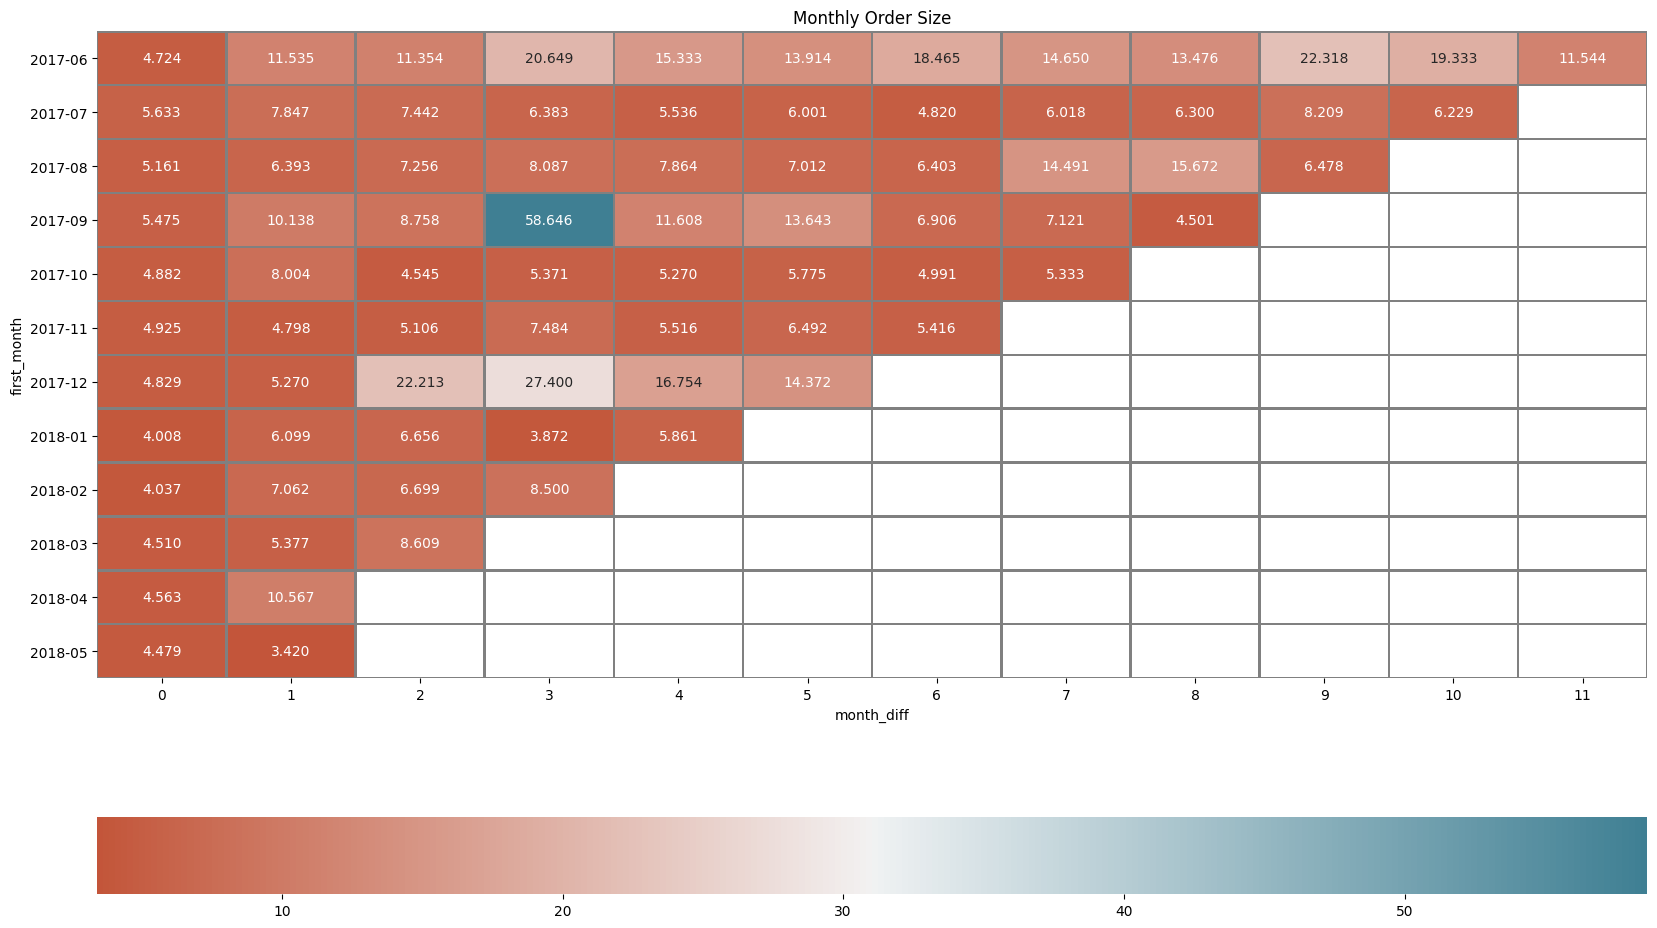

In [45]:
fig, ax = plt.subplots(figsize = (20,12))
purchase_user.index= purchase_user.index.astype(str)
sns.heatmap(purchase_user, annot=True, fmt='.3f', linewidths=1, linecolor='grey', cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws={'orientation':'horizontal'}).set(title = "Monthly Order Size")

plt.show()

In [46]:
purchase_retention = purchase_user.copy()
for col in purchase_retention.columns[1:]:
    purchase_retention[col] = purchase_retention[col] / purchase_retention[0]
    
purchase_retention[0] = purchase_retention[0] / purchase_retention[0]

purchase_retention.fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,1.0,2.441568,2.4033,4.370788,3.245489,2.945062,3.908494,3.100995,2.852464,4.724015,4.092237,2.443429
2017-07,1.0,1.392922,1.321161,1.133091,0.982735,1.065233,0.855593,1.068316,1.118413,1.457225,1.105743,
2017-08,1.0,1.238664,1.405887,1.566915,1.523747,1.358551,1.240643,2.807653,3.036552,1.255105,,
2017-09,1.0,1.851726,1.599582,10.71143,2.120148,2.491886,1.261357,1.300708,0.822047,,,
2017-10,1.0,1.639360,0.93083,1.100058,1.07942,1.182862,1.022183,1.092215,,,,
2017-11,1.0,0.974258,1.03682,1.519679,1.120121,1.318291,1.09969,,,,,
2017-12,1.0,1.091347,4.600248,5.674424,3.469603,2.976372,,,,,,
2018-01,1.0,1.521743,1.660644,0.966056,1.462289,,,,,,,
2018-02,1.0,1.749488,1.659502,2.105711,,,,,,,,


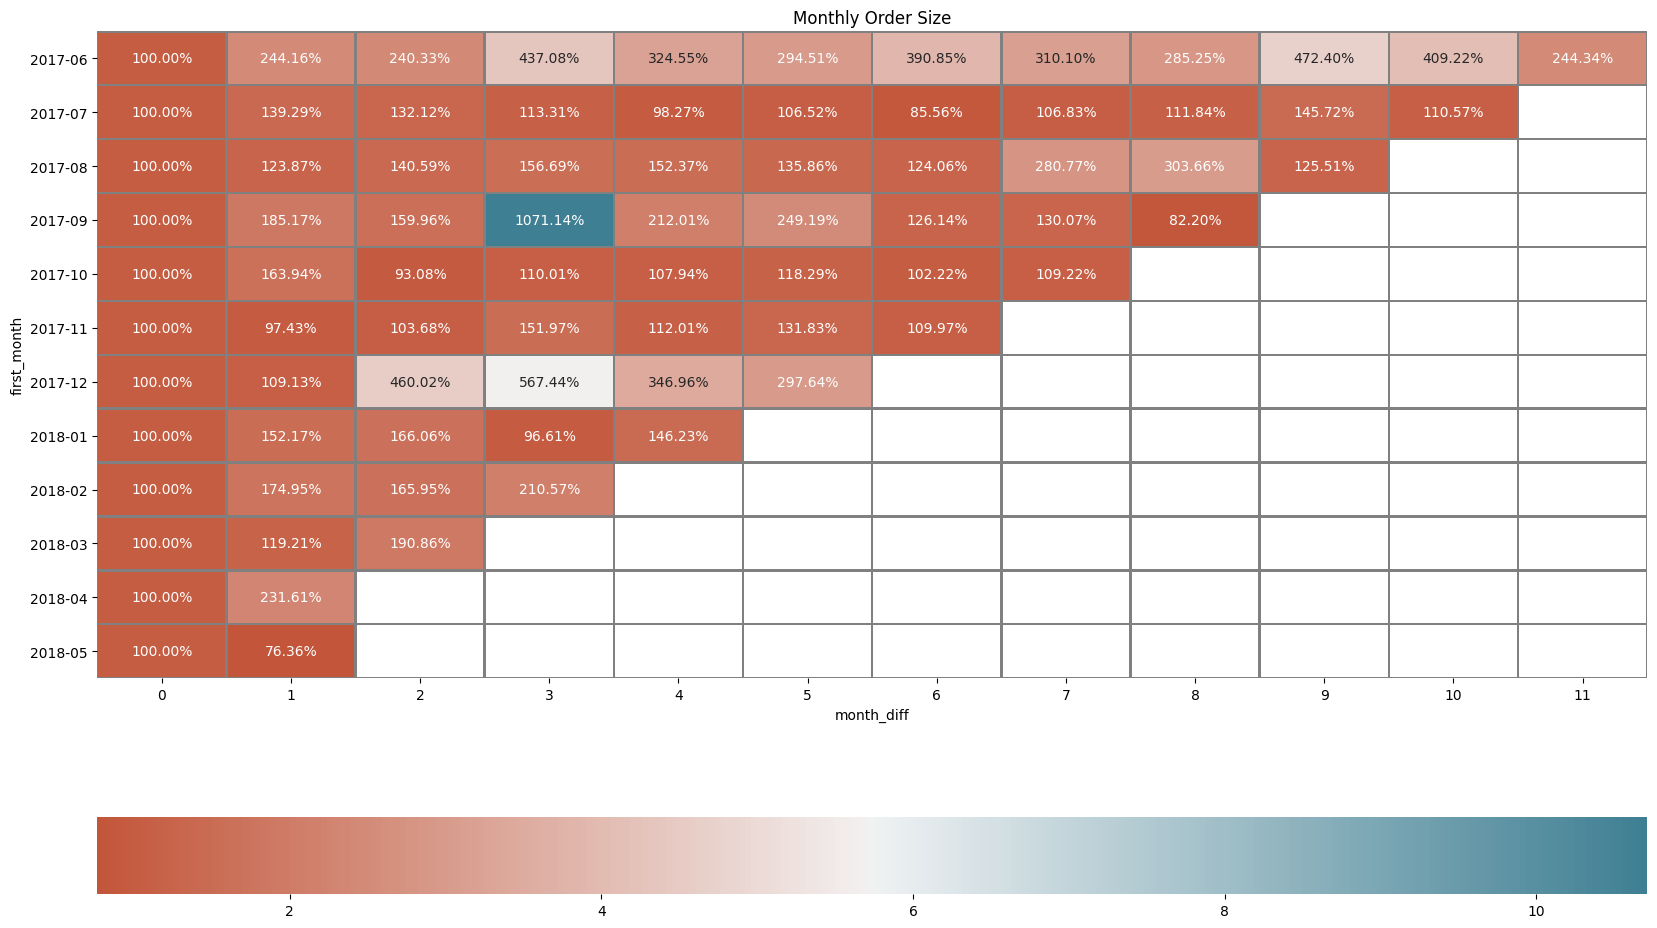

In [47]:
fig, ax = plt.subplots(figsize = (20,12))
purchase_user.index= purchase_user.index.astype(str)
sns.heatmap(purchase_retention, annot=True, fmt='.2%', linewidths=1, linecolor='grey', cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws={'orientation':'horizontal'}).set(title = "Monthly Order Size")
plt.show()

- foi possivel ver a retenção dos clientes durante cada periodo

# Quantos pedidos os clientes fazem durante um determinado período de tempo?

In [48]:
first_order_visit.head()

,uid,first_month,buy_ts,revenue,order_month,week,month,month_diff
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01/2018-01-07,2018-01,4
1,1575281904278712,2017-06,2017-06-03 10:13:00,1.22,2017-06-01,2017-05-29/2017-06-04,2017-06,0
2,1575281904278712,2017-06,2017-06-03 17:39:00,1.83,2017-06-01,2017-05-29/2017-06-04,2017-06,0
3,2429014661409475,2017-10,2017-10-11 18:33:00,73.33,2017-10-01,2017-10-09/2017-10-15,2017-10,0
4,2464366381792757,2018-01,2018-01-28 15:54:00,2.44,2018-01-01,2018-01-22/2018-01-28,2018-01,0


# Qual é o volume médio de uma compra?

In [49]:
first_order['first_purchase_month'] = first_order['first_purchase'].dt.to_period('M')
cohort_sizes = first_order.groupby('first_purchase_month')['uid'].nunique().reset_index().rename(columns = {'uid' : 'n_buyers', 'first_purchase_month' : 'first_month'})
cohort_sizes.head()

,first_month,n_buyers
0,2017-06,2023
1,2017-07,1923
2,2017-08,1370
3,2017-09,2581
4,2017-10,4340


In [50]:
cohort = pd.merge(first_order_visit, cohort_sizes, on='first_month')
cohort.head()

,uid,first_month,buy_ts,revenue,order_month,week,month,month_diff,n_buyers
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01/2018-01-07,2018-01,4,2581
1,12695041396440380,2017-09,2017-09-01 23:54:00,7.33,2017-09-01,2017-08-28/2017-09-03,2017-09,0,2581
2,12695041396440380,2017-09,2017-09-02 00:02:00,7.33,2017-09-01,2017-08-28/2017-09-03,2017-09,0,2581
3,16118742129536584,2017-09,2017-09-30 10:23:00,0.18,2017-09-01,2017-09-25/2017-10-01,2017-09,0,2581
4,16118742129536584,2017-09,2017-10-21 11:22:00,0.40,2017-10-01,2017-10-16/2017-10-22,2017-10,1,2581


# Quanto dinheiro eles trazem para a empresa (LTV)?

In [51]:
cohort['LTV'] = cohort['revenue'] / cohort['n_buyers']
cohort.head()

,uid,first_month,buy_ts,revenue,order_month,week,month,month_diff,n_buyers,LTV
0,313578113262317,2017-09,2018-01-03 21:51:00,0.55,2018-01-01,2018-01-01/2018-01-07,2018-01,4,2581,0.000213
1,12695041396440380,2017-09,2017-09-01 23:54:00,7.33,2017-09-01,2017-08-28/2017-09-03,2017-09,0,2581,0.002840
2,12695041396440380,2017-09,2017-09-02 00:02:00,7.33,2017-09-01,2017-08-28/2017-09-03,2017-09,0,2581,0.002840
3,16118742129536584,2017-09,2017-09-30 10:23:00,0.18,2017-09-01,2017-09-25/2017-10-01,2017-09,0,2581,0.000070
4,16118742129536584,2017-09,2017-10-21 11:22:00,0.40,2017-10-01,2017-10-16/2017-10-22,2017-10,1,2581,0.000155


In [52]:
cohort_ltv = cohort.pivot_table(
    index = 'first_month',
    columns = 'month_diff',
    values = 'LTV',
    aggfunc = 'sum'
).cumsum(axis=1)

cohort_ltv.round(2).fillna('')

month_diff,0,1,2,3,4,5,6,7,8,9,10,11
first_month,,,,,,,,,,,,
2017-06,4.72,6.04,6.77,8.68,10.63,12.03,13.75,14.88,16.02,17.74,18.83,19.79
2017-07,5.14,5.69,6.26,6.77,7.21,7.63,7.94,8.34,8.71,9.02,9.26,
2017-08,4.55,5.28,6.01,6.7,7.29,7.68,8.04,8.95,9.55,9.83,,
2017-09,4.79,6.22,7.04,11.08,11.58,12.32,12.7,12.89,13.05,,,
2017-10,4.23,5.11,5.41,5.66,5.9,6.13,6.27,6.42,,,,
2017-11,4.05,4.70,5.03,5.37,5.64,5.81,5.99,,,,,
2017-12,3.85,4.24,5.2,6.37,6.7,7.11,,,,,,
2018-01,3.14,3.72,4.07,4.16,4.31,,,,,,,
2018-02,3.15,3.70,3.88,4.13,,,,,,,,


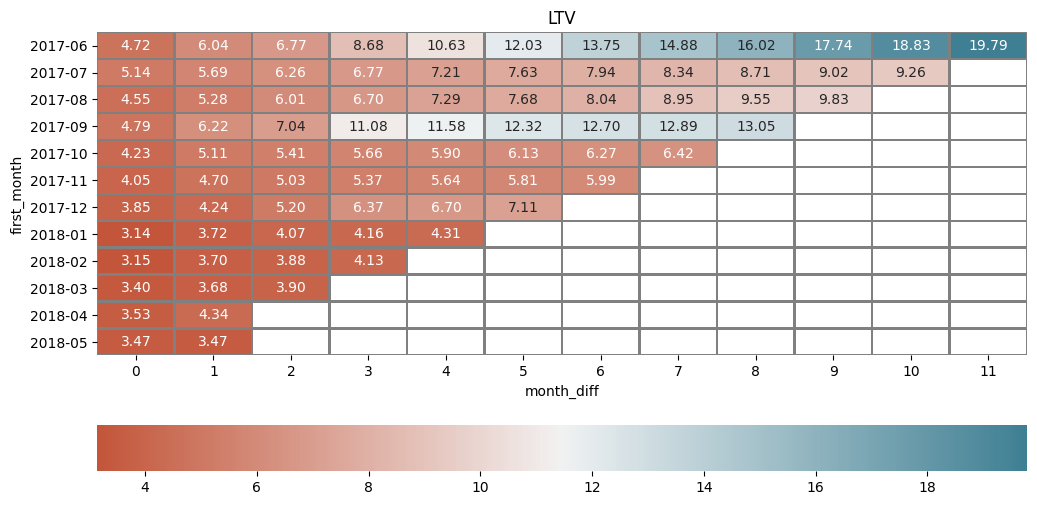

In [53]:
fig, ax = plt.subplots(figsize = (12,6))
cohort_ltv.index = cohort_ltv.index.astype(str)
sns.heatmap(cohort_ltv, annot=True, fmt='.2f', linewidths=1, linecolor='grey',  cmap=sns.diverging_palette(20, 220, as_cmap=True), cbar_kws= {'orientation': 'horizontal'}
            ).set(title ='LTV')
plt.show()

In [54]:
print("Average LTV in 3 months is:", round(cohort_ltv[2].mean(),2))

Average LTV in 3 months is: 5.36


- foi possível saber quando os clientes começaram a comrprar
- durante um periódo quandos pedidos foram feitos pelos clientes
- e o quanto isso trouxe de retorno para a empresa

# Quanto dinheiro foi gasto? No total/por origem/ao longo do tempo

In [55]:
df_costs.head()

,source_id,dt,costs,df
0,1,2017-06-01,75.20,2017-06-01
1,1,2017-06-02,62.25,2017-06-02
2,1,2017-06-03,36.53,2017-06-03
3,1,2017-06-04,55.00,2017-06-04
4,1,2017-06-05,57.08,2017-06-05


In [56]:
print("Total costs {}".format(df_costs['costs'].sum()))

Total costs 329131.62


In [57]:
df_costs['costs_month'] = df_costs['dt'].dt.to_period('M')


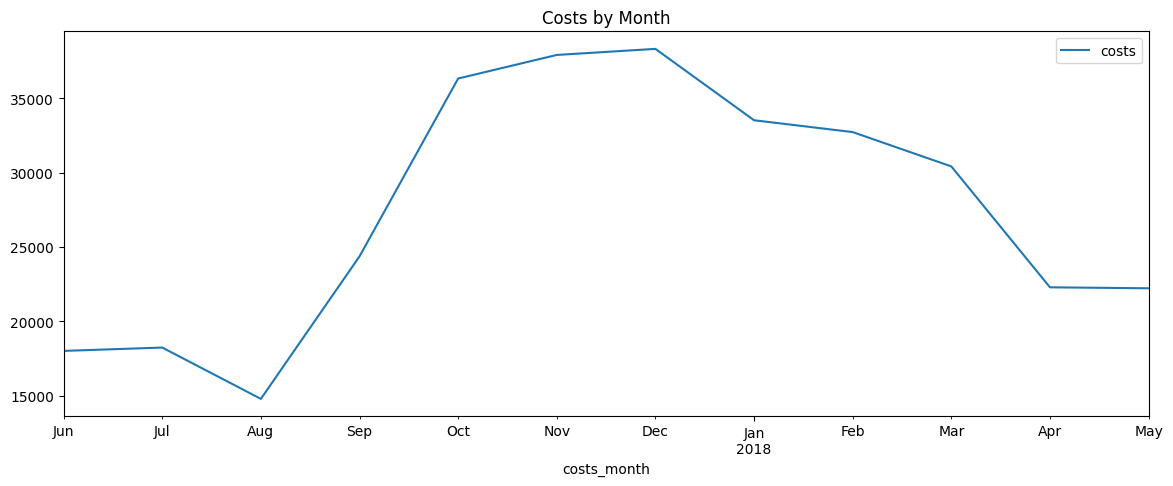

In [58]:
costs_month = df_costs.pivot_table(
    index = 'costs_month',
    values = 'costs',
    aggfunc = 'sum').plot(figsize = (14, 5), title = 'Costs by Month')
plt.show()

# Quanto custou a aquisição de clientes para cada origem

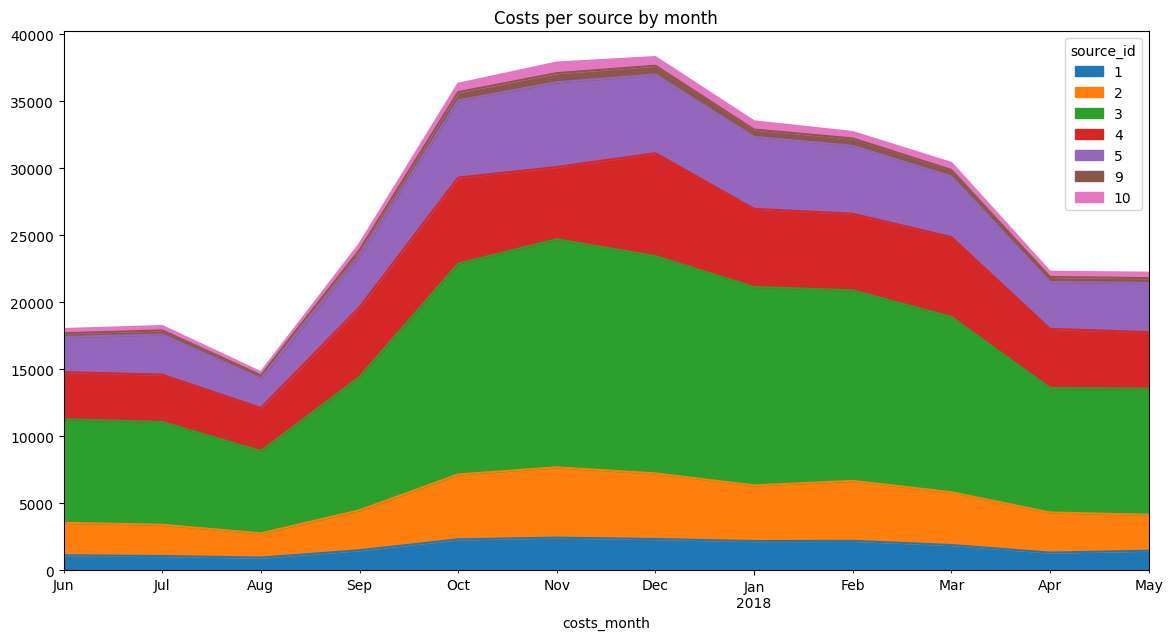

In [59]:
costs_source = df_costs.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum').plot.area(figsize=(14,7), title='Costs per source by month')
plt.show()

In [60]:
print("Mean CAC is:", round(df_costs['costs'].sum() / df_orders['uid'].nunique(), 2))

Mean CAC is: 9.01


In [61]:
first_order.head()

,uid,first_purchase,first_purchase_month
0,313578113262317,2018-01-01,2018-01
1,1575281904278712,2017-06-01,2017-06
2,2429014661409475,2017-10-01,2017-10
3,2464366381792757,2018-01-01,2018-01
4,2551852515556206,2017-11-01,2017-11


In [62]:
# CAC by month
CAC_by_month = pd.merge(df_costs.groupby('costs_month').agg({'costs': 'sum'}), first_order.groupby('first_purchase_month').agg({'uid': 'nunique'}), left_index=True, right_index=True)


In [63]:
CAC_by_month['CAC'] = CAC_by_month['costs'] / CAC_by_month['uid']

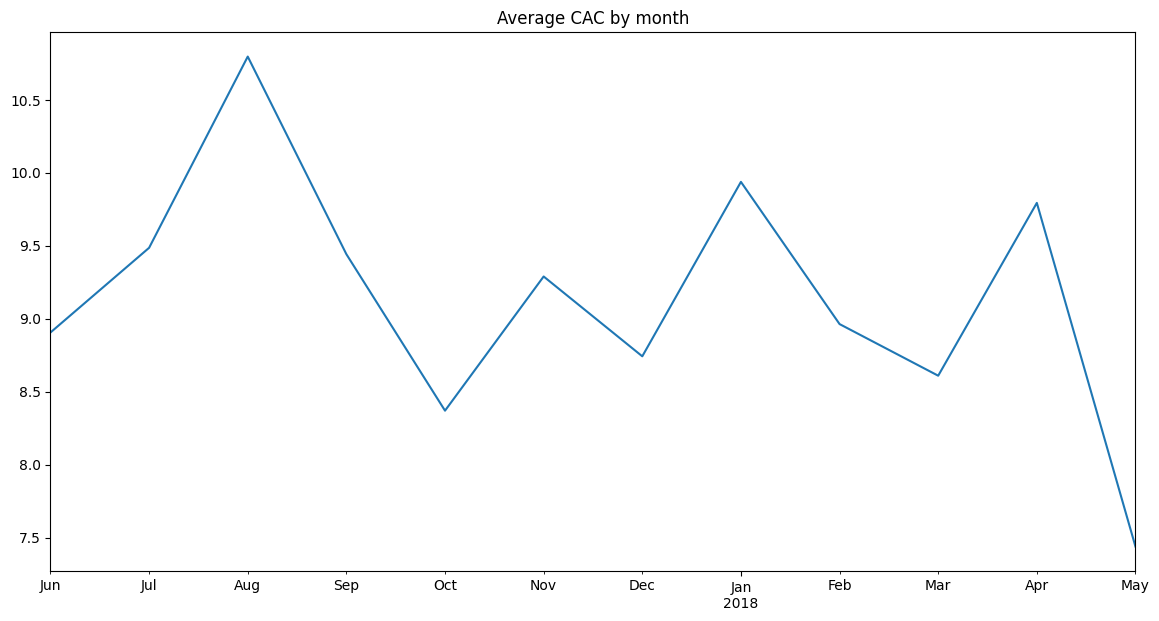

In [64]:
CAC_by_month['CAC'].plot(figsize=(14, 7), title = 'Average CAC by month');

In [65]:
user_source = df_visits[['uid', 'source_id']].drop_duplicates()

In [66]:
first_order = pd.merge(first_order, user_source, on = 'uid')

In [67]:
CAC_per_month = pd.merge(df_costs.groupby(['costs_month', 'source_id']).agg({'costs':'sum'}).reset_index().rename(columns = {'costs_month' : 'month'}),
                        first_order.groupby(['first_purchase_month', 'source_id']).agg({'uid':'nunique'}).reset_index().rename(columns = {'first_purchase_month':'month'}),
                        on = ['month', 'source_id'])


In [68]:
CAC_per_month['month'] = CAC_per_month['month'].astype(str)



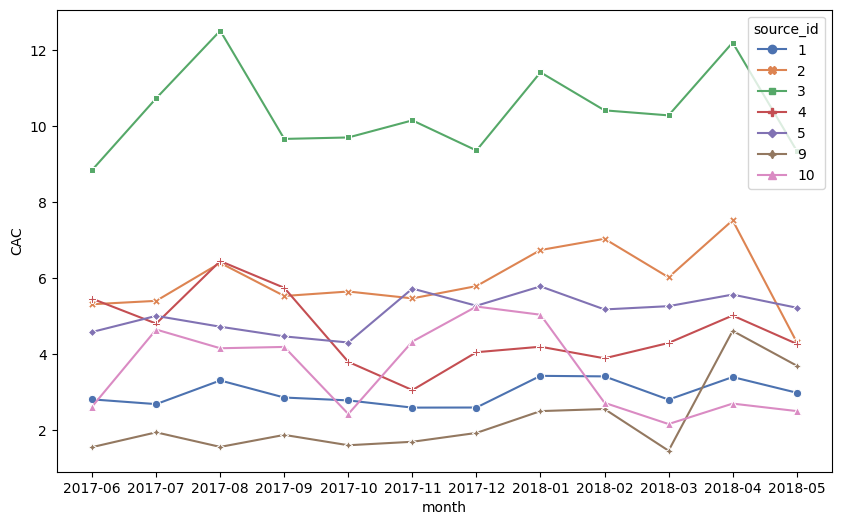

In [69]:
CAC_per_month['CAC'] = CAC_per_month['costs']  / CAC_per_month['uid']

fig, ax = plt.subplots(figsize = (10,6))
sns.lineplot(x = 'month', y = 'CAC', hue = 'source_id', data = CAC_per_month, palette='deep', markers=True, style='source_id', dashes=False);


- foi possivel descobrir quanto custou a aquisição de novos clientes em cada origem

# Os investimento valeram a pena? (ROI)

In [70]:
df_orders.head()

,buy_ts,revenue,uid,order_month,week,month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-05-29/2017-06-04,2017-06
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-05-29/2017-06-04,2017-06
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-05-29/2017-06-04,2017-06
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-05-29/2017-06-04,2017-06
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-05-29/2017-06-04,2017-06


In [71]:
month_revenue = df_orders.groupby(['uid', 'month']).agg({'revenue': 'sum'}).reset_index()
month_revenue.head()

,uid,month,revenue
0,313578113262317,2018-01,0.55
1,1575281904278712,2017-06,3.05
2,2429014661409475,2017-10,73.33
3,2464366381792757,2018-01,2.44
4,2551852515556206,2017-11,10.99


In [72]:
buyers = first_order.merge(month_revenue, on = 'uid')
buyers['source_id'].value_counts()

4     16892
3     16399
5     12144
2      9583
1      9180
9      3717
10     2027
7         1
Name: source_id, dtype: int64

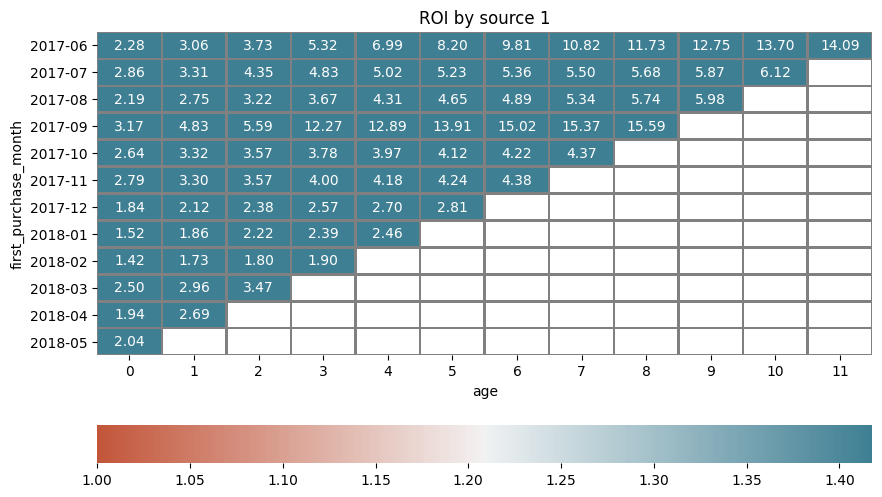

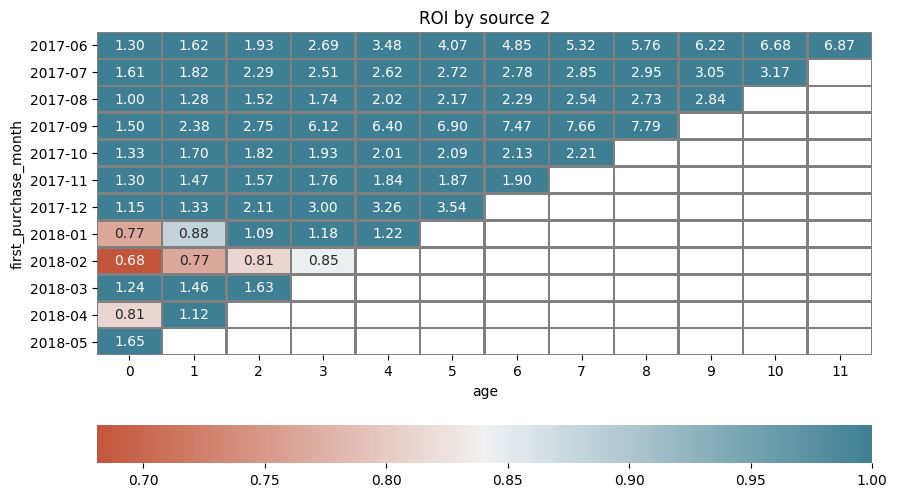

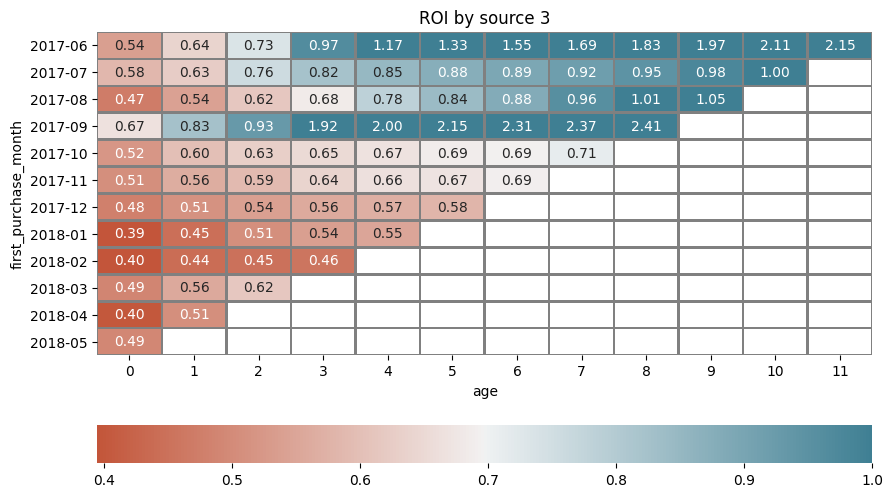

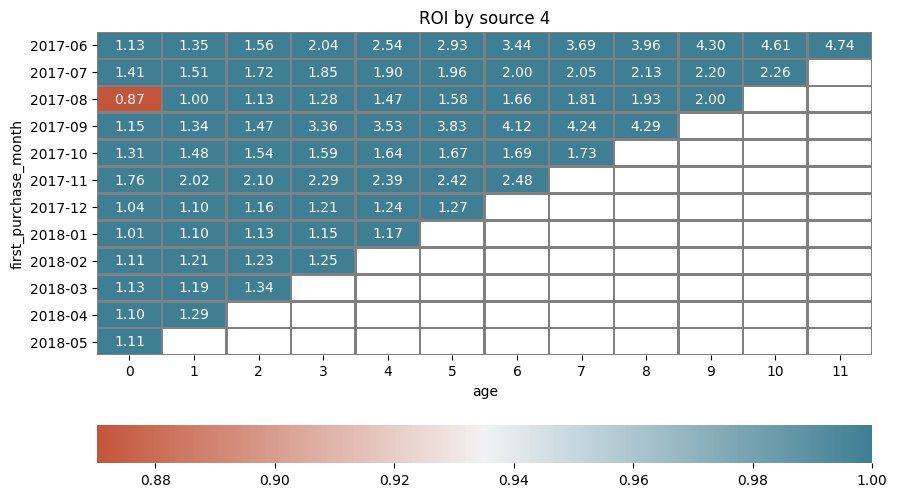

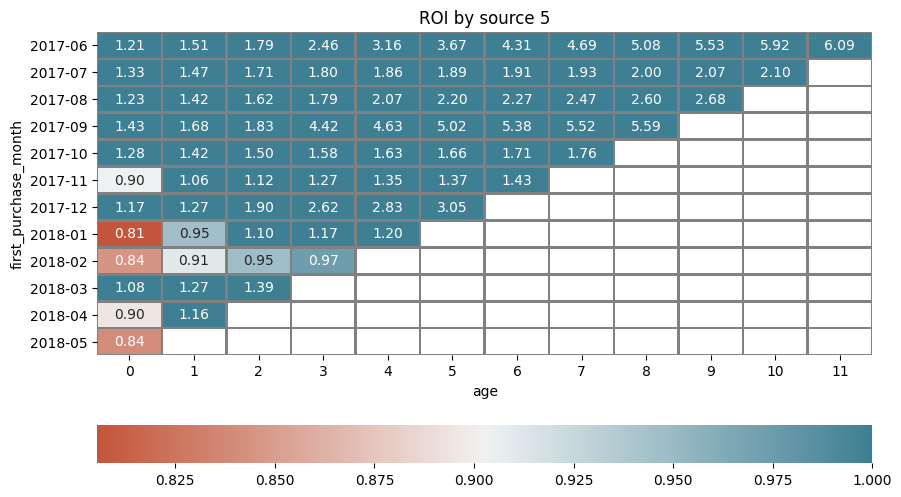

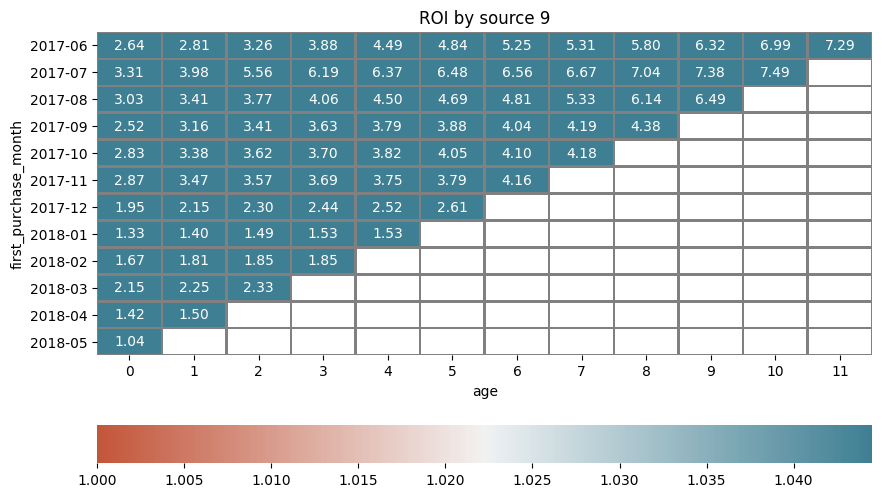

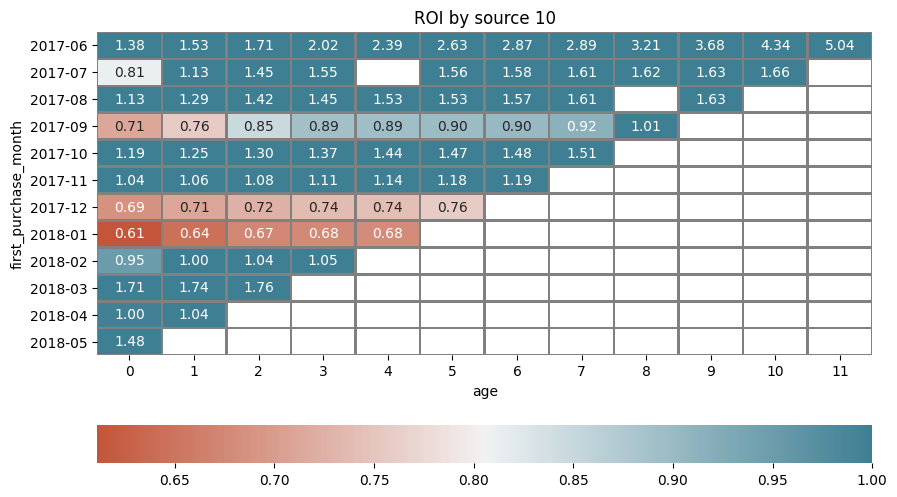

In [73]:
for source, df in buyers.groupby('source_id'):
      if source == 6 or source == 7:
            continue
      cohort_sizes_t = (
          df.groupby(['source_id', 'first_purchase_month'])
          .agg({'uid': 'nunique'})
          .reset_index()
      )
      cohort_sizes_t.columns = ['source_id', 'first_purchase_month', 'n_buyers']

      cohorts_revenue_t = (
          df.groupby(['source_id', 'first_purchase_month', 'month'])
          .agg({'revenue': 'sum'})
          .reset_index()
      )
      cohorts_revenue_t.columns = ['source_id', 'first_purchase_month', 'order_month', 'gp']

      report_romi = pd.merge(cohort_sizes_t, cohorts_revenue_t, on=['source_id', 'first_purchase_month'])
      report_romi['age'] = (report_romi['order_month'].astype(int) - report_romi['first_purchase_month'].astype(int))
      report_romi['age'] = report_romi['age'].round().astype('int')
      report_romi['ltv'] = report_romi['gp'] / report_romi['n_buyers']

      report_romi = pd.merge(report_romi,df_costs.groupby(['source_id', 'costs_month']).agg({'costs': 'sum'}).reset_index(),
                      left_on=['source_id', 'first_purchase_month'], right_on=['source_id', 'costs_month'])
      report_romi = report_romi.drop(['costs_month'], axis = 1)
      report_romi['cac'] = report_romi['costs'] / report_romi['n_buyers']
      report_romi['romi'] = report_romi['ltv'] / report_romi['cac']


      romi = report_romi\
              .pivot_table(index='first_purchase_month', columns='age', values='romi', aggfunc='mean')\
              .cumsum(axis=1)
      romi.round(2).fillna('')
    
      romi.index=romi.index.astype(str)
      fig, ax = plt.subplots(figsize = (10, 6))
      sns.heatmap(romi, annot=True, fmt='.2f', linewidths=1, linecolor='grey',  cmap=sns.diverging_palette(20, 220, as_cmap=True), vmax = 1, cbar_kws= {'orientation': 'horizontal'}
          ).set(title ='ROI by source {}'.format(source))
      plt.show()


 - nesse último item não consegui fazer o mapa de calor para todos os ROIs

- foi possivel verificar a diferença de ROIs entre os siferentes source_id

- aqui foi possivel perceber a diferença entre os ROIs 
- a diferença entre eles é razoavelmente grande, pois os LTVs e o CACs também são diferentes

# Conclusão

- foi possivel concluir que existe diferença entre os diferentes source
- foi possivel ver que vale a pena o investimento
- a diferença entre como as pessoas usam o produto diariamente, semanalmente e mensalmente
- com que frequencia as pessoas usam
- o tempo em cada sessão
- quando as pessoas começaram a usar
- quanto dinheiro os clientes trazem para a empresa
- e a diferença entre os ROIs

obs: refiz o projeto depois que assiti o webnario, tirei varias dúvidas e com ajuda de um projeto semelhante, gostaria de saber o que ainda falta (e o item que deu errado) para depois disso fazer uma reunião com o monitor